## DCGAN 18_9_24

In [1]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow  as tf
from tensorflow.keras import layers
tf.__version__

'2.12.0'

# loading and Preprocessing the dataset


The left side of the assignment destructures the returned tuples from load_data(). X_train: This is the training dataset containing the images of the handwritten digits. It will be a NumPy array of shape (60000, 28, 28) where 60,000 is the number of training samples, and 28x28 is the resolution of each image. y_train: This is the training labels corresponding to X_train. It contains the digit labels (0-9) for each image, with shape (60000). (_,_): This part is used to ignore the test data. The underscore () is a convention to signify that the value is being ignored. So, you're not storing X_test and y_test in this case.

In [2]:
(X_train, y_train),(_,_) =tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
28*28  #actual shape of each image

784

In [5]:
y_train.shape

(60000,)

5


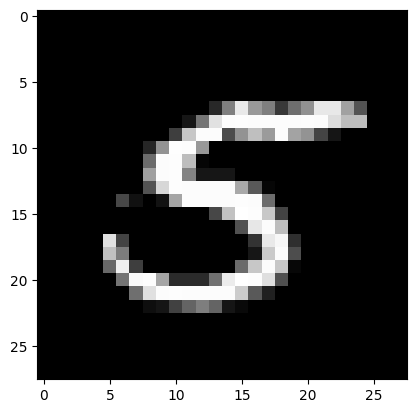

In [6]:
#select the randam image from the dataset
i=np.random.randint(0,60000)
#print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

#converting the data into the float format

In [7]:
#make it in the float format
X_train=X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')

In [8]:
X_train[1]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [9]:
X_train.shape

(60000, 28, 28, 1)

#To make the Normalization we can check the min and max of the data

In [10]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

#Normalize the data into the -1 and 1 format

In [11]:
X_train=(X_train-127.5)/ 127.5

In [12]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [13]:
buffer_size=60000
batch_size=256

In [15]:
buffer_size/batch_size  #Mini Batch Decide how many iteration in each batch so it is used for traning

234.375

In [16]:
type(X_train)

numpy.ndarray

In [17]:
#it is going to slice the 60000 image into the batch of 256 and it is going to suffle the image tin the batches
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

This code transforms X_train (which is typically a large dataset) into a tf.data.Dataset object, shuffles the data with a buffer size of buffer_size, and groups it into batches of size batch size for efficient training. This is a typical preprocessing step before feeding data into a TensorFlow model.

In [18]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [19]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

#Buliding the Generator

- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/

- Funções de ativação:
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e


- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [20]:
 7*7*256

12544

In [21]:
def build_generator():
    network = tf.keras.Sequential()

    # First layer: Dense layer with input shape (noise vector), typically 100 dimensions
    network.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # Reshape output to a 7x7x256 tensor
    network.add(layers.Reshape((7, 7, 256)))

    # First Conv2DTranspose layer to upscale the image to 14x14x128
    network.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # Second Conv2DTranspose layer to upscale to 14x14x64
    network.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # Third Conv2DTranspose layer to upscale to 28x28x1
    network.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    network.summary()
    return network

In [22]:
# Build and display the generator model
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

In [23]:
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_input')>

In [24]:
noise=tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-3.3594471e-01,  1.4220569e+00, -9.4989163e-01, -8.6494708e-01,
         8.1856188e-04, -1.1906149e+00,  4.5920673e-01, -2.2786920e+00,
         1.7784731e+00, -5.9129667e-01, -1.1902900e+00,  1.6092081e-01,
         1.4633090e+00,  7.4812341e-01, -2.4677986e-01,  2.4342614e-01,
        -2.3047943e-01,  9.4268161e-01,  3.2546386e-01,  1.5348910e+00,
         4.1327953e-02, -2.6650009e-01,  1.1102024e+00,  4.8576561e-01,
        -1.2510320e+00,  1.3073080e+00,  1.3917118e-02,  9.4091100e-01,
         3.7533659e-01, -2.4739313e+00,  5.4299849e-01,  4.1723710e-01,
         2.1337487e-02,  6.7156360e-02, -8.7023109e-01,  9.4510430e-01,
        -6.1689883e-01, -9.2729813e-01, -3.4770024e-01,  6.8432862e-01,
         8.7420958e-01, -6.8859756e-01, -1.7664775e-01, -6.6818756e-01,
        -8.7874579e-01, -3.1462070e-01, -6.3690114e-01,  1.9110290e+00,
        -1.6792005e+00,  6.3153371e-02, -1.2459179e-01, -1.3717856e+00,
         8.883

In [25]:
genearted_image=generator(noise,training=False)

In [26]:
genearted_image

<tf.Tensor: shape=(1, 28, 28, 1), dtype=float32, numpy=
array([[[[-1.41849613e-03],
         [ 1.78849557e-04],
         [ 7.84980832e-04],
         [-2.00856198e-03],
         [-4.07612557e-03],
         [-6.81133568e-03],
         [-1.23310462e-03],
         [-2.54024100e-03],
         [-7.04417750e-03],
         [-6.13642670e-03],
         [-5.64624183e-03],
         [-3.61204543e-03],
         [-1.11564910e-02],
         [ 2.09965277e-03],
         [-1.02572944e-02],
         [-8.21847189e-03],
         [ 6.32972363e-03],
         [ 1.50350481e-02],
         [ 1.85025996e-03],
         [-8.93592427e-04],
         [-9.17521212e-03],
         [ 2.36932863e-03],
         [-8.38102959e-03],
         [-1.12155871e-03],
         [ 5.64757129e-03],
         [ 3.07923206e-03],
         [ 1.36935362e-03],
         [-1.23138330e-03]],

        [[-5.13631618e-03],
         [ 7.03704893e-04],
         [-5.22690965e-03],
         [ 1.68007205e-03],
         [ 3.50556476e-03],
         [ 4.31340

In [27]:
genearted_image.shape

TensorShape([1, 28, 28, 1])

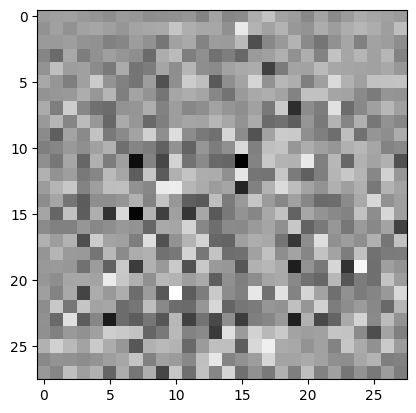

In [28]:
plt.imshow(genearted_image[0, : ,:,0], cmap='gray')

## Buliding the Discriminator
- Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
- Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d

In [29]:
def build_discriminator():
    network = tf.keras.Sequential()

    # 14x14x64
    network.add(layers.Conv2D(filters=64 , strides=(2,2), kernel_size=(5,5), padding='same', input_shape=[28,28,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # First Conv2DTranspose layer to upscale the image to 7x7x128
    network.add(layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(2,2), padding='same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()
    return network

In [30]:
# Build and display the generator model
discriminator = build_discriminator()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [31]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [32]:
discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [33]:
discriminator(genearted_image, training=False) #logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00168147]], dtype=float32)>

In [35]:
tf.sigmoid(-0.00168147)
#this is the fake digits wihich having the probability less than 0.5 so it is fake image

<tf.Tensor: shape=(), dtype=float32, numpy=0.49957964>

# ERROR Calculation
- Logits: https://deepai.org/machine-learning-glossary-and-terms/logit


This method quantifies how well the discriminator is able to distinguish real images from fakes images. It compares the discriminator predictions on real images with an array of 1s and the discriminator predictions on fake (generated) images with an array of Os.

In [36]:
#ouput is in the from of logits not in the activation function so logits are used
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [37]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [56]:
def discriminator_loss(expected_output, fake_output):
  real_loss=cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss=cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss=real_loss+fake_loss
  return total_loss

In [57]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [58]:
generator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

# Training the GAN  and visualizing the Results
- Based on: https://www.tensorflow.org/beta/tutorials/generative/dcgan
- @tf.function: https://www.tensorflow.org/guide/function#:~:text=You%20can%20use%20tf.,is%20required%20to%20use%20SavedModel%20.

In [59]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [60]:
epochs=100
noise_dimension=100
number_of_images=16

In [61]:
batch_size, noise_dimension

(256, 100)

In [67]:
@tf.function
#this decorator tells Tensorflow to complie the function into a graph
#which improves performance by optimizing the execution
#especially on large datasets or when traning over many iterartion
def train(images):
  noise=tf.random.normal([batch_size, noise_dimension])
  #print(noise)
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    #tf.GradientTape(): tensorflow GradientTape is used to record operations
    #for automatically differentiation. in this case two tapes are used to
    # separately track the computations for the generator (gen_tape)
    #and discrimitor (disc_tape)
    #this is the crucial because both networks need to be tranined simultaneously
    #but independently
    generated_images=generator(noise, training=True)

    expected_output= discriminator(images, training=True)
    fake_output=discriminator(generated_images, training=True)
    gen_loss= generator_loss(fake_output)
    disc_loss=discriminator_loss(expected_output, fake_output)
    #generator(noise, training-True): The generator takes the random noise
    #as input and produces generated_images. The training True flag ensures
    #that any training-specific behavior (like dropout) is activated.

#discriminator(images, training=True): The discriminator takes the real images
#from the dataset and produces expected_output, which is its prediction
#about the realness of the images.

#discriminator(generated_images, training True): The discriminator also evaluates
#the generated images produced by the generator and outouts
#fake_output, which is its prediction about the realness of the fake images.

    generator_gradients= gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients= disc_tape.gradient(disc_loss, discriminator.trainable_variables)

#gen_tape.gradient: Computes the gradients of the gen_loss with respect to
#the generator's trainable variables (its weights and biases).
#These gradients will be used to update the generator.

#disc_tape.gradient: Computes the gradients of the disc_loss with respect
#to the discriminator's trainable variables.
#These gradients will be used to update the discriminator.

    generator_optimizer.apply_gradients (zip (generator_gradients,generator.trainable_variables))
    discriminator_optimizer.apply_gradients (zip (discriminator_gradients,discriminator.trainable_variables))

#generator_optimizer.apply_gradients: This applies the computed gradients
#to update the generator's parameters, using the generator_optimizer.
#The zip(generator_gradients, generator.trainable_variables) pairs each gradient
#with the corresponding trainable variable.

#discriminator_optimizer.apply_gradients: Similarly, this updates the discriminator

In [68]:
epochs=100
noise_dimension=100
number_of_images=16

In [69]:
batch_size, noise_dimension

(256, 100)

In [70]:
test_images=tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [71]:
#it is used for the decoding, it is for optional part , it is eagrely trained
tf.config.run_functions_eagerly(True)
X_train_batch= X_train. as_numpy_iterator(). next()
train(X_train_batch)
#Purpose : this  lines configure Tensorflows to run functions eagerly
#even if they are decorated with @tf.function.
#what is Eager Execution?: In eager execution, TensorFlow operations are
#executed immediately as Python operations (like normal Python code)
#rather than being compiled into a graph. This is helpful for debugging
# because it allows you to step through operations and inspect
#intermediate values.
#Why use run_functions_eagerly (True)?: By default,
#Tensorflow compiles @tf.function decorated code into a graph for efficiency.
# However, if you need to debug your training process or check intermediate
#results (like inspecting gradients, losses, etc.), you can enable
#eager execution. This makes TensorFlow behave more like regular Python code #and simplifies debugging.

In [72]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

In [ ]:
train_gan(X_train, epochs, test_images)

dataset: The input dataset used for training, typically a set of images. epochs: The number of training iterations (how many times the model should go through the dataset). test_images: A set of test images used to generate output during the training process for visualizing the progress. Inside the epoch loop, another loop runs through each image_batch in the dataset. train(image_batch): This is a placeholder for the training function that handles training the GAN. After every epoch, it prints the current epoch number. generator(test_images, training=False): This calls the generator model with test_images to generate new images. The argument training=False indicates that the generator is in inference mode, so it won't apply training-related operations like dropout. fig = plt.figure(figsize=(10,10)): Creates a figure for

In [ ]:
#it is next part for the lareg dataset not complusary
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

      print('Epoch: ', epoch + 1)
      generated_images = generator(test_images, training = False)
      fig= plt.figure(figsize = (10,10))
      for i in range(generated_images.shape[0]):
        plt.subplot(4,4,1 + 1)
        plt.imshow(generated_images[i, :, :, 0] 127.5+ 127.5, cmap='gray')
        plt.axis('off')
      plt.show()